In [1]:
import pandas as pd
import numpy as np
from collections import Counter as C
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_error,r2_score
from sklearn import metrics
import pickle

In [2]:
data=pd.read_csv('concrete_data.csv')
data

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
data.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [4]:
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
data.tail()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [6]:
data.shape

(1030, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [8]:
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
#mean
np.mean(data)

269.444832793959

In [10]:
#median
np.median(data)

125.30000000000001

In [11]:
#mode 
vals, counts = np.unique(data, return_counts=True)
max_count_index = np.argmax(counts)
mode_value = vals[max_count_index]
print("Mode:", mode_value)

Mode: 0.0


In [12]:
data.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blast_furnace_slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
fly_ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarse_aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
concrete_compressive_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


# Handling missed values.

In [13]:
data.isnull().any()

cement                           False
blast_furnace_slag               False
fly_ash                          False
water                            False
superplasticizer                 False
coarse_aggregate                 False
fine_aggregate                   False
age                              False
concrete_compressive_strength    False
dtype: bool

In [14]:
data.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [15]:
#data['cement']=data['cement'].fillna(data['cement'].mean(),inplace=True)
#data['blast_furnace_slag']=data['blast_furnace_slag'].fillna(data['blast_furnace_slag'].mean(),inplace=True)
#data['fly_ash']=data['fly_ash'].fillna(data['fly_ash'].mean(),inplace=True)
#data['water']=data['water'].fillna(data['water'].mean(),inplace=True)
#data['coarse_aggregate']=data['coarse_aggregate'].fillna(data['coarse_aggregate'].mean(),inplace=True)
#data['superplasticizer']=data['superplasticizer'].fillna(data['superplasticizer'].mean(),inplace=True)
#data['age']=data['age'].fillna(data['age'].mean(),inplace=True)
#data['concrete_compressive_strength']=data['concrete_compressive_strength'].fillna(data['concrete_compressive_strength'].mean(),inplace=True)

# Data visuvalization

<Axes: >

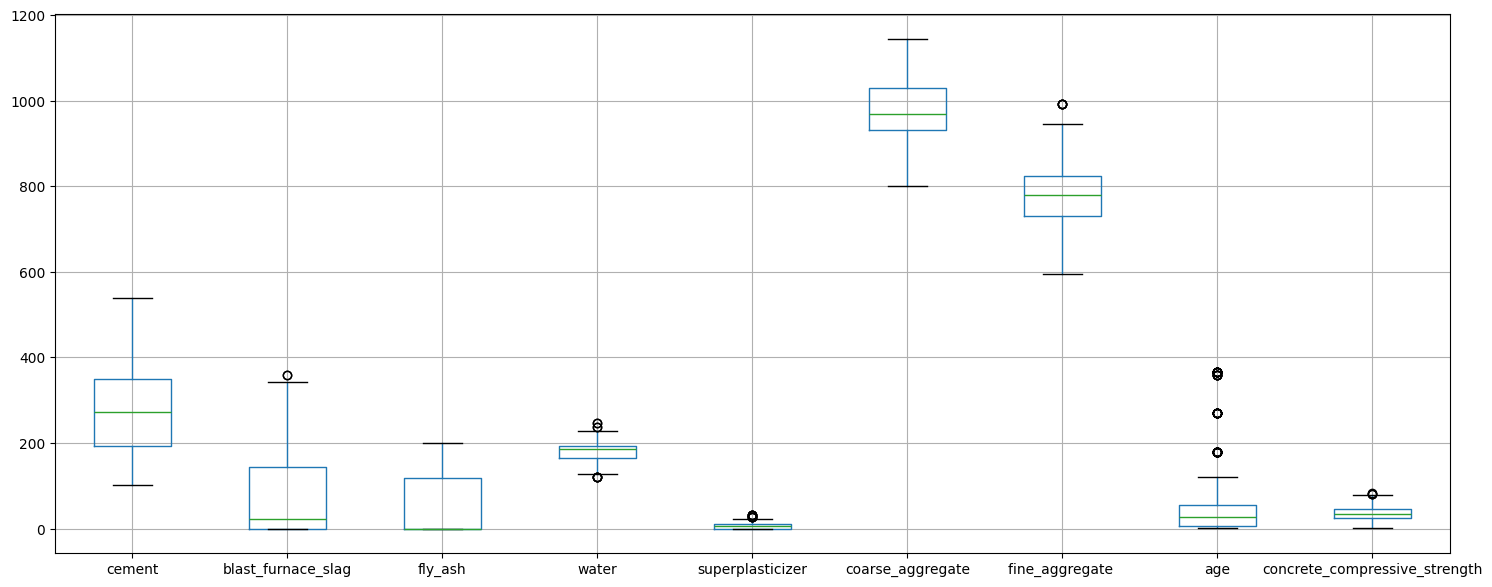

In [16]:
data.boxplot(figsize=(18,7))

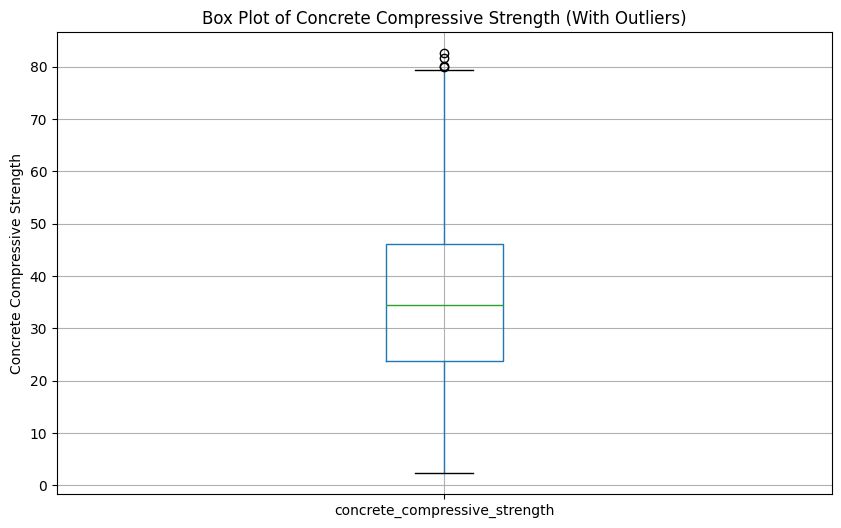

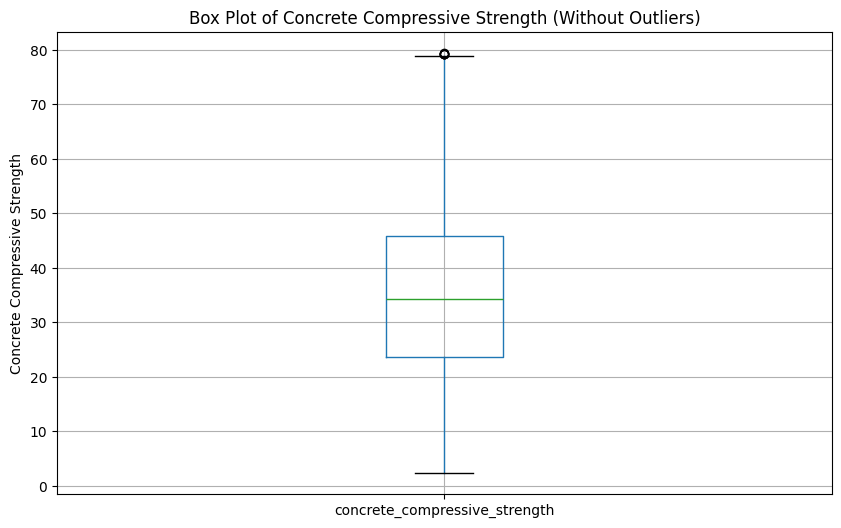

In [17]:
# Filter out the outliers for concrete_compressive_strength
plt.figure(figsize=(10, 6))
data.boxplot(column='concrete_compressive_strength')
plt.title('Box Plot of Concrete Compressive Strength (With Outliers)')
plt.ylabel('Concrete Compressive Strength')
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['concrete_compressive_strength'].quantile(0.25)
Q3 = data['concrete_compressive_strength'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = data[(data['concrete_compressive_strength'] >= lower_bound) & 
                     (data['concrete_compressive_strength'] <= upper_bound)]

# Create a box plot of the filtered data
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='concrete_compressive_strength')
plt.title('Box Plot of Concrete Compressive Strength (Without Outliers)')
plt.ylabel('Concrete Compressive Strength')
plt.show()

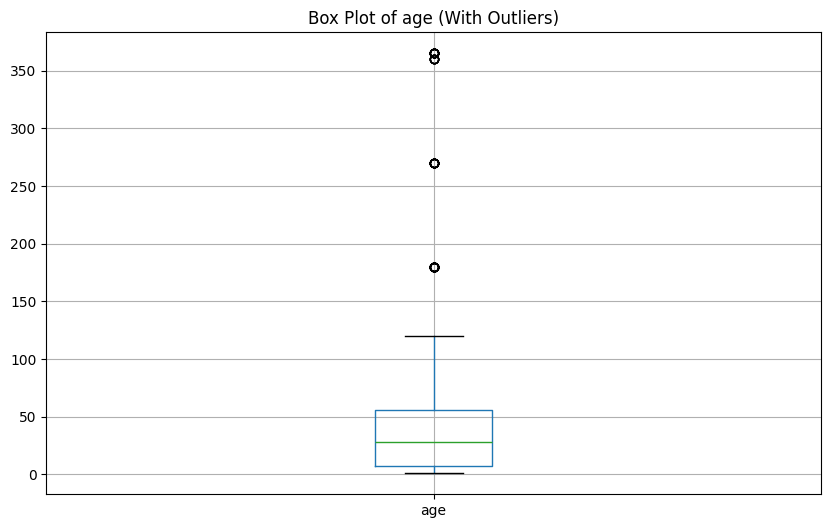

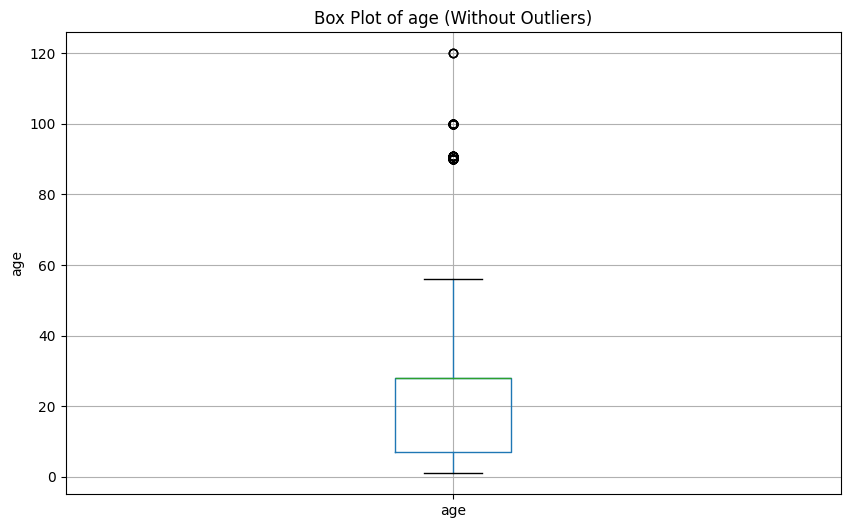

In [18]:
# Filter out the outliers for age
plt.figure(figsize=(10, 6))
data.boxplot(column='age')
plt.title('Box Plot of age (With Outliers)')
plt.show()
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = data[(data['age'] >= lower_bound) & 
                     (data['age'] <= upper_bound)]

# Create a box plot of the filtered data
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='age')
plt.title('Box Plot of age (Without Outliers)')
plt.ylabel('age')
plt.show()

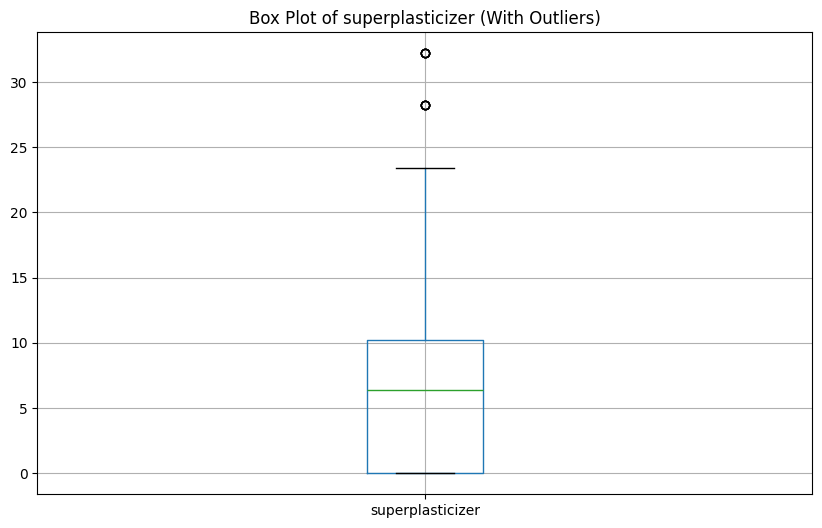

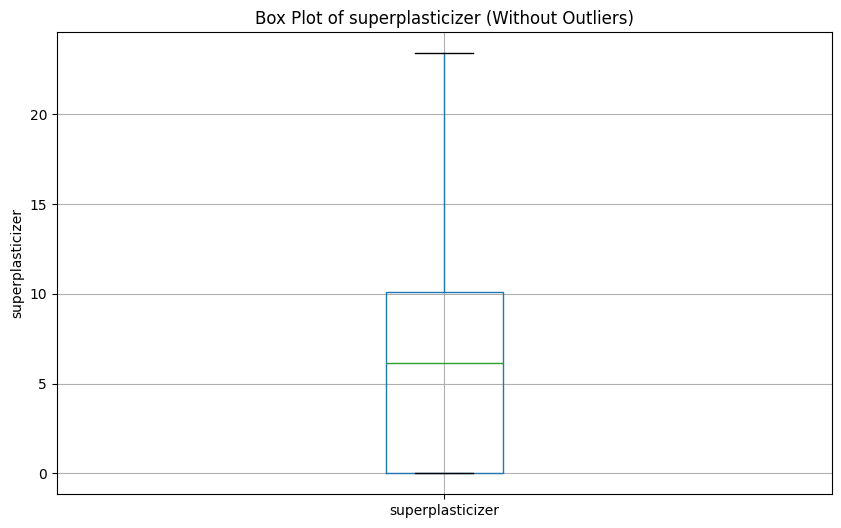

In [19]:
# Filter out the outliers for superplasticizer
plt.figure(figsize=(10, 6))
data.boxplot(column='superplasticizer')
plt.title('Box Plot of superplasticizer (With Outliers)')
plt.show()
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['superplasticizer'].quantile(0.25)
Q3 = data['superplasticizer'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = data[(data['superplasticizer'] >= lower_bound) & 
                     (data['superplasticizer'] <= upper_bound)]

# Create a box plot of the filtered data
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='superplasticizer')
plt.title('Box Plot of superplasticizer (Without Outliers)')
plt.ylabel('superplasticizer')
plt.show()

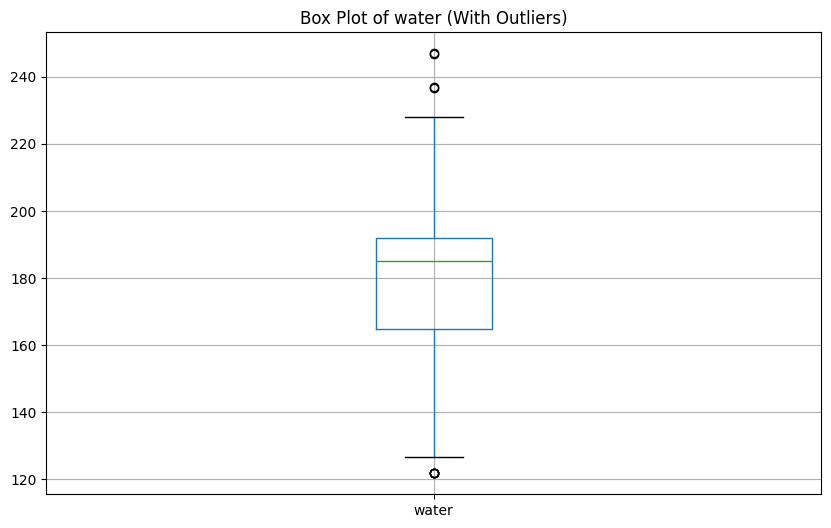

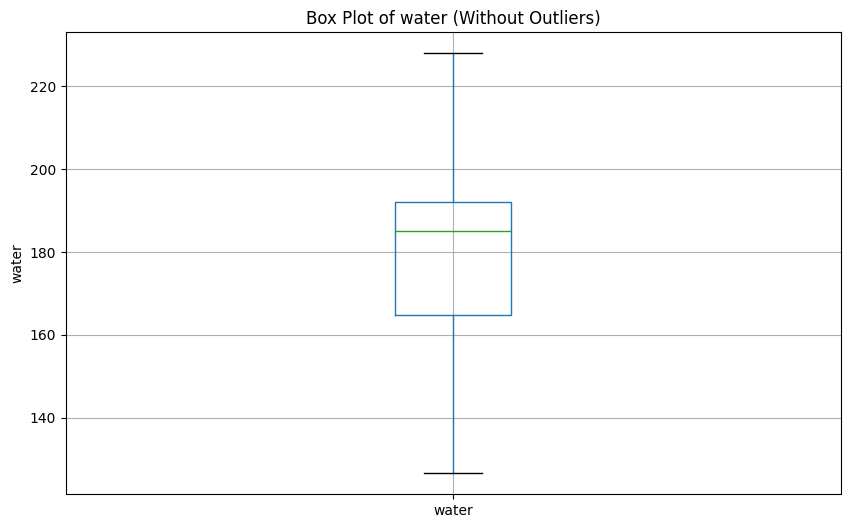

In [20]:
# Filter out the outliers for water
plt.figure(figsize=(10, 6))
data.boxplot(column='water')
plt.title('Box Plot of water (With Outliers)')
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['water'].quantile(0.25)
Q3 = data['water'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = data[(data['water'] >= lower_bound) & 
                     (data['water'] <= upper_bound)]

# Create a box plot of the filtered data
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='water')
plt.title('Box Plot of water (Without Outliers)')
plt.ylabel('water')
plt.show()

In [21]:
data=filtered_data
data.shape

(1021, 9)

# Bivarient Analysis

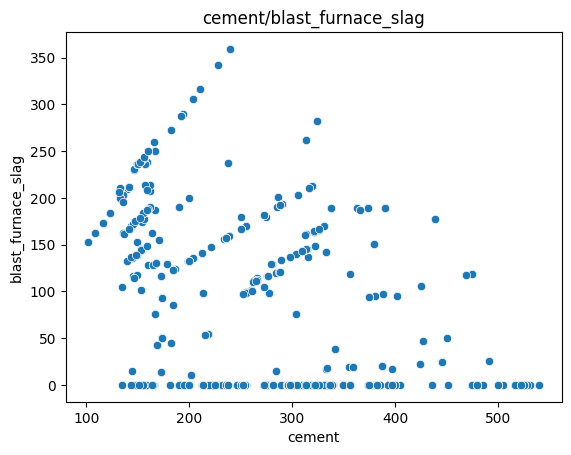

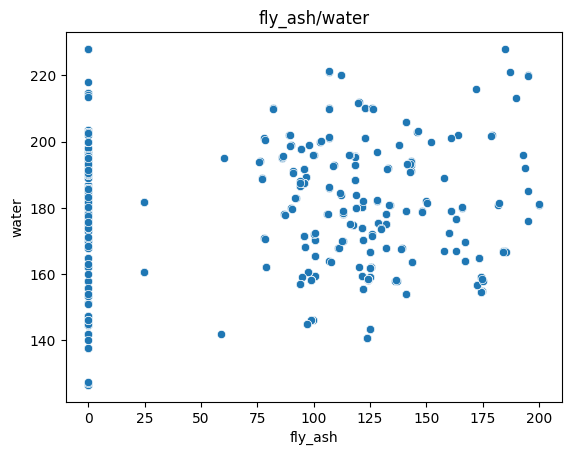

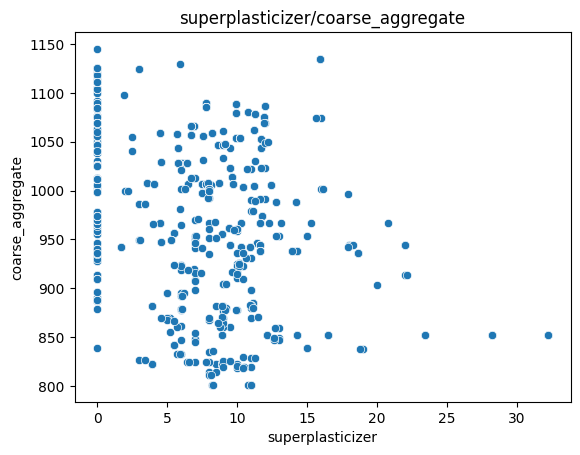

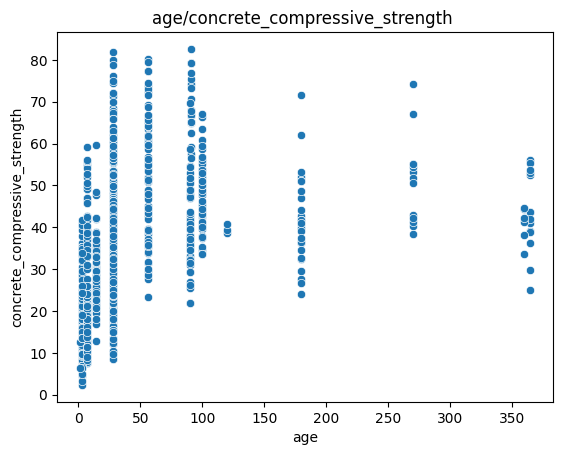

In [22]:
sns.scatterplot(x=data.cement,y=data.blast_furnace_slag)
plt.title('cement/blast_furnace_slag')
plt.show()
sns.scatterplot(x=data.fly_ash,y=data.water)
plt.title('fly_ash/water')
plt.show()
sns.scatterplot(x=data.superplasticizer,y=data.coarse_aggregate)
plt.title('superplasticizer/coarse_aggregate')
plt.show()
sns.scatterplot(x=data.age,y=data.concrete_compressive_strength)
plt.title('age/concrete_compressive_strength ')
plt.show()

# spliting data into independent and dependent variables

In [23]:
y=data['concrete_compressive_strength']
x=data.drop(columns=['concrete_compressive_strength'],axis=1)

In [24]:
#dependent variable
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 1021, dtype: float64

In [25]:
#independent variables
x

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


# Scaling on Independent variables

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scale=StandardScaler()

In [28]:
names=x.columns
names

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age'],
      dtype='object')

In [29]:
scale.fit_transform(x)

array([[ 2.47029964, -0.85371354, -0.83951873, ...,  0.86522257,
        -1.22044581, -0.28027563],
       [ 2.47029964, -0.85371354, -0.83951873, ...,  1.05874947,
        -1.22044581, -0.28027563],
       [ 0.48286898,  0.79382497, -0.83951873, ..., -0.52817112,
        -2.24233577,  3.53920825],
       ...,
       [-1.27947916,  0.75798378,  0.86545922, ..., -1.03908214,
         0.07560975, -0.28027563],
       [-1.17795259,  1.30485095, -0.83951873, ...,  0.21497218,
         0.1865222 , -0.28027563],
       [-0.20291432,  0.30823467,  0.38976096, ..., -1.39904217,
        -0.15493859, -0.28027563]])

In [30]:
x=pd.DataFrame(x,columns=names)
x

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


# Splitting Dataset into test and train.

In [31]:
#Splitting Dataset in 80% traing dataset and 20% in Test Dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
# printing the shape of x_train, x_test, y_train, y_test
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(816, 8)
(205, 8)
(816,)
(205,)


In [33]:
y_test

1016    15.09
27      52.12
77      33.40
284     13.62
324     21.78
        ...  
736     12.05
430     24.28
540     24.40
534     19.20
624     27.53
Name: concrete_compressive_strength, Length: 205, dtype: float64

In [34]:
x_test

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
1016,164.2,0.0,200.1,181.2,12.6,849.3,846.0,28
27,342.0,38.0,0.0,228.0,0.0,932.0,670.0,180
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3
284,181.4,0.0,167.0,169.6,7.6,1055.6,777.8,3
324,252.3,0.0,98.8,146.3,14.2,987.8,889.0,3
...,...,...,...,...,...,...,...,...
736,238.0,0.0,0.0,186.0,0.0,1119.0,789.0,7
430,194.7,0.0,100.5,170.2,7.5,998.0,901.8,14
540,480.0,0.0,0.0,192.0,0.0,936.2,712.2,3
534,393.0,0.0,0.0,192.0,0.0,940.6,785.6,3


# Model Building

## linear regression 

In [35]:
#importing and building linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
# Training the Model
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [36]:
acc=r2_score(y_test,pred)
print('accuracy of linear regression Regression:',acc*100)

accuracy of linear regression Regression: 58.61758560675364


In [37]:
print('MSE:', metrics.mean_squared_error(y_test,pred))
print('MAE:', metrics.mean_absolute_error(y_test,pred))

MSE: 110.18594180669501
MAE: 8.261594213211119


In [38]:
print('RMSE:' ,np.sqrt(metrics.mean_squared_error(y_test,pred)))

RMSE: 10.49694916662432


In [39]:
lr.coef_

array([ 0.12017996,  0.10381629,  0.0940527 , -0.19529715,  0.20468966,
        0.01702083,  0.0160985 ,  0.10998134])

## Ridge Regression

In [40]:
#importing and building Ridge Regression
from sklearn.linear_model import Ridge
r=Ridge()
# Ridge Training
r.fit(x_train,y_train)
pred=r.predict(x_test)

In [41]:
acc=r2_score(y_test,pred)
print('accuracy of Ridge regression Regression:',acc*100)

accuracy of Ridge regression Regression: 58.61760529691513


In [42]:
print('MSE:', metrics.mean_squared_error(y_test,pred))
print('MAE:', metrics.mean_absolute_error(y_test,pred))

MSE: 110.18588937913565
MAE: 8.261589878127149


In [43]:
print('RMSE:' ,np.sqrt(metrics.mean_squared_error(y_test,pred)))

RMSE: 10.49694666934798


In [44]:
r.coef_

array([ 0.12018016,  0.10381648,  0.09405327, -0.19529975,  0.20467241,
        0.01702044,  0.01609849,  0.10998131])

## Lasso Regression

In [45]:
#importing and building Lasso Regression
from sklearn.linear_model import Lasso
l=Lasso()
#lasso training
l.fit(x_train,y_train) 
pred=l.predict(x_test)

In [46]:
acc=r2_score(y_test,pred)
print('accuracy of lasso regression Regression:',acc*100)

accuracy of lasso regression Regression: 58.78727632129104


In [47]:
print('MSE:', metrics.mean_squared_error(y_test,pred))
print('MAE:', metrics.mean_absolute_error(y_test,pred))

MSE: 109.73411869605009
MAE: 8.244898906700172


In [48]:
print('RMSE:' ,np.sqrt(metrics.mean_squared_error(y_test,pred)))

RMSE: 10.475405419173526


In [49]:
l.coef_

array([ 0.11849281,  0.10170859,  0.09289939, -0.21575121,  0.13224843,
        0.01290659,  0.01292619,  0.10964209])

## Decision Tree Regression

In [50]:
#importing and building Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
df=DecisionTreeRegressor(criterion='squared_error',random_state=0)
df.fit(x_train,y_train) 
pred=df.predict(x_test)

In [51]:
acc=r2_score(y_test,pred)
print('accuracy of Decision Tree Regression:',acc*100)

accuracy of Decision Tree Regression: 88.49267192424941


In [52]:
print('MSE:', metrics.mean_squared_error(y_test,pred))
print('MAE:', metrics.mean_absolute_error(y_test,pred))

MSE: 30.63972463414634
MAE: 3.6327804878048777


In [53]:
print('RMSE:' ,np.sqrt(metrics.mean_squared_error(y_test,pred)))

RMSE: 5.5353161277515435


## RandomForest Regression

In [54]:
#importing and building Randomforest Regression
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(criterion='squared_error',random_state=0)
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [55]:
acc=r2_score(y_test,pred)
print('accuracy of RandomForest Regression:',acc*100)

accuracy of RandomForest Regression: 91.92079061215962


In [56]:
print("MSE: ",metrics.mean_squared_error(pred,y_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(pred,y_test)))

MSE:  21.511922600580977
RMSE:  4.6380947166461555


## GradientBoosting Regression

In [57]:
#importing and building GradientBoosting Regression
from sklearn.ensemble import GradientBoostingRegressor
grb=GradientBoostingRegressor()
grb.fit(x_train,y_train)
y_pred=grb.predict(x_test)

In [58]:
score=r2_score(y_pred,y_test)
print("accuracy of GradientBoosting Regression:: ",score*100)

accuracy of GradientBoosting Regression::  88.26858337487137


In [59]:
print("MSE: ",metrics.mean_squared_error(pred,y_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(pred,y_test)))

MSE:  21.511922600580977
RMSE:  4.6380947166461555


## XGBoost Regression

In [60]:
import xgboost
xgb=xgboost.XGBRegressor()
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)

In [61]:
score=r2_score(pred,y_test)
print("accuracy of XGBoost Regression:: ",score*100)

accuracy of XGBoost Regression::  92.62911257081528


In [62]:
print("MSE: ",metrics.mean_squared_error(pred,y_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(pred,y_test)))

MSE:  17.96478280626198
RMSE:  4.238488268977747


# Hyperparameter Tuning

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
from scipy.stats import uniform, randint

In [65]:
from sklearn.model_selection import GridSearchCV

## Random Forest Regression using RandomizedSearchCV 

In [66]:
#importing and building Random Forest Regression using hyperparameter RandomizedSearchCV 
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(criterion='squared_error',random_state=0)

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)


In [67]:
# Fit the model
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E5F2FB3620>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E5F58372F0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E5C833C620>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E5F30FF410>},
                   random_state=42, verbose=2)

In [68]:
best_rf= random_search.best_estimator_
best_params = random_search.best_params_
pred = best_rf.predict(x_test)

In [69]:
print(f'Optimal Hyperparameters:{best_params}')
acc=r2_score(y_test,pred)
print('accuracy of RandomForestRegression:',acc*100)

Optimal Hyperparameters:{'bootstrap': True, 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 620}
accuracy of RandomForestRegression: 91.14142251484361


In [70]:
print('MSE:', metrics.mean_squared_error(y_test,pred))
print('MAE:', metrics.mean_absolute_error(y_test,pred))

MSE: 23.587089288556324
MAE: 3.514265078126178


In [71]:
print('RMSE:' ,np.sqrt(metrics.mean_squared_error(y_test,pred)))

RMSE: 4.856654124863775


## Gradient Boost Regression using RandomizedSearchCV

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'max_depth': [3, 4, 5, 6],
    # ... other hyperparameters
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_dist, 
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\Vedasri Varshini\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01,
                                                          0.005],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [73]:
best_gb= random_search.best_estimator_
best_params = random_search.best_params_
pred = best_gb.predict(x_test)

In [74]:
print(f'Optimal Hyperparameters:{best_params}')
acc=r2_score(y_test,pred)
print('accuracy of Gradient Boosting Regressor:',acc*100)

Optimal Hyperparameters:{'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.1}
accuracy of Gradient Boosting Regressor: 93.81277020067044


In [75]:
print('MSE:', metrics.mean_squared_error(y_test,pred))
print('MAE:', metrics.mean_absolute_error(y_test,pred))

MSE: 16.474286302754656
MAE: 2.5120155828454145


In [76]:
print('RMSE:' ,np.sqrt(metrics.mean_squared_error(y_test,pred)))

RMSE: 4.058852830881486


## Gradient Boosting Regression using GridSearchCV

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
from sklearn.model_selection import GridSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'max_depth': [3, 4, 5, 6],
    # ... other hyperparameters
}
grid_search = GridSearchCV(estimator=gb, param_grid=param_dist, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01, 0.005],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [78]:
best_gb= grid_search.best_estimator_
best_params = grid_search.best_params_
pred = best_gb.predict(x_test)

In [79]:
print(f'Optimal Hyperparameters:{best_params}')
acc=r2_score(y_test,pred)
print('accuracy of Gradient boosting Regression:',acc*100)

Optimal Hyperparameters:{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}
accuracy of Gradient boosting Regression: 93.83512805041315


## XGBoost Regression using RandomizedSearchCV

In [80]:
import xgboost as xgb 
xg=xgb.XGBRegressor()
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param= {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

random_search = RandomizedSearchCV(estimator=xg, param_distributions=param_dist,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\Vedasri Varshini\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01,
                                                          0.005],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [81]:
best_xg= random_search.best_estimator_
best_params = random_search.best_params_
pred =best_xg.predict(x_test)

In [82]:
print(f'Optimal Hyperparameters:{best_params}')
acc=r2_score(y_test,pred)
print('accuracy of XGBoost Regression:',acc*100)

Optimal Hyperparameters:{'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.1}
accuracy of XGBoost Regression: 93.7152345090757


In [83]:
print('MSE:', metrics.mean_squared_error(y_test,pred))
print('MAE:', metrics.mean_absolute_error(y_test,pred))

MSE: 16.733987487320853
MAE: 2.586632443683904


In [84]:
print('RMSE:' ,np.sqrt(metrics.mean_squared_error(y_test,pred)))

RMSE: 4.0907196784087825


## XGBoost Regression using GridSearchCV

In [85]:
#importing and building XGBoost Regression using GridSearchCV
import xgboost as xgb 
xgb=xgb.XGBRegressor()
# Define the parameter grid
param= {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50]
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param, 
                           cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [86]:
best_xgb= grid_search.best_estimator_
best_params = grid_search.best_params_
pred = best_xgb.predict(x_test)

In [87]:
print(f'Optimal Hyperparameters:{best_params}')
acc=r2_score(y_test,pred)
print('accuracy of XGBoost Regression:',acc*100)

Optimal Hyperparameters:{'max_depth': None, 'n_estimators': 200}
accuracy of XGBoost Regression: 93.22882639139073


# selecting best model

In [88]:
import xgboost as xgb
xg= xgb.XGBRegressor()
xg.fit(x_train,y_train)
y_pred = xg.predict(x_test)
r2_score(y_test,y_pred)

0.9325298604900404

# prediction Model

In [89]:
def predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age):
    features = np.array([[cem,blastf,flyas,water,superplaster,courseagg,fineagg,age]])
    prediction = xg.predict(features).reshape(1,-1)
    
    return prediction[0]

In [90]:
x_train

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
385,520.0,0.0,0.0,170.0,5.2,855.0,855.0,28
204,212.1,0.0,121.6,180.3,5.7,1057.6,779.3,3
366,214.9,53.8,121.9,155.6,9.6,1014.3,780.6,28
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
771,331.0,0.0,0.0,192.0,0.0,978.0,825.0,3
...,...,...,...,...,...,...,...,...
840,310.0,143.0,0.0,168.0,10.0,914.0,804.0,28
192,233.8,0.0,94.6,197.9,4.6,947.0,852.2,56
634,275.0,0.0,0.0,183.0,0.0,1088.0,808.0,28
564,158.8,238.2,0.0,185.7,0.0,1040.6,734.3,28


In [91]:
cem = 276.4								
blastf = 116.0
flyas = 90.3
water = 179.6
superplaster = 8.9
courseagg = 870.1
fineagg = 768.3
age = 28

prediction = predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age)
print("strength is : ",prediction)

strength is :  [44.40285]


# saving the best model

### model is saved in the "model_training.py" file

In [92]:
#pickle.dump(xg,open('cement.pkl','wb'))